# Car price

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
df = pd.read_csv("../data/car_price_dataset.csv")
df.shape

(10000, 10)

In [3]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


## Analysis

### Full dataframe

In [4]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [5]:
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

## Univariate

In [6]:
df["Brand"].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [7]:
df["Year"].value_counts().sort_index().head()

Year
2000    393
2001    406
2002    462
2003    381
2004    394
Name: count, dtype: int64

## Bivariate

In [8]:
df.groupby("Brand").agg({"Price": ["min", "mean", "median", "max"]})

Price                            
             min         mean  median    max
Brand                                       
Audi        2000  8929.373796  8917.0  18255
BMW         2000  8704.068068  8741.0  17386
Chevrolet   2000  9015.683948  9038.0  17661
Ford        2000  8852.570611  8775.5  18017
Honda       2000  8665.596630  8624.0  17906
Hyundai     2000  8778.279397  8755.0  17871
Kia         2000  8880.086066  8914.0  17630
Mercedes    2000  8980.087049  9142.0  17614
Toyota      2000  8798.184536  8726.0  18301
Volkswagen  2000  8928.377451  8976.0  16461

## Graphs

In [9]:
gp = df.groupby("Brand").agg(max=("Mileage", "max"))
gp.reset_index(inplace=True)
gp

,Brand,max
0,Audi,299714
1,BMW,299371
2,Chevrolet,299947
3,Ford,299652
4,Honda,299818
5,Hyundai,299626
6,Kia,298476
7,Mercedes,299287
8,Toyota,299872
9,Volkswagen,299016


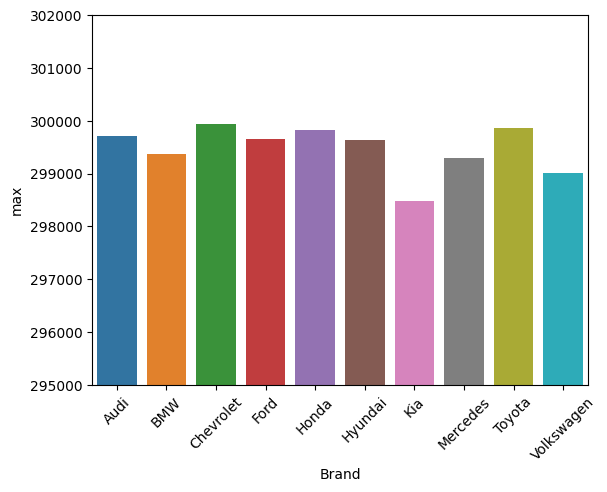

In [10]:
sns.barplot(gp, x="Brand", y="max")

plt.ylim(295000, 302000)

plt.xticks(rotation=45);

In [11]:
gp = df.groupby(["Year", "Brand"]).agg(mean=("Price", "mean"))
gp.reset_index(inplace=True)
gp

,Year,Brand,mean
0,2000,Audi,5538.142857
1,2000,BMW,5061.325581
2,2000,Chevrolet,4783.433333
3,2000,Ford,5082.945946
4,2000,Honda,5872.272727
...,...,...,...
235,2023,Hyundai,12279.023256
236,2023,Kia,12205.638889
237,2023,Mercedes,12198.097561
238,2023,Toyota,11993.906977


<Axes: xlabel='Year', ylabel='mean'>

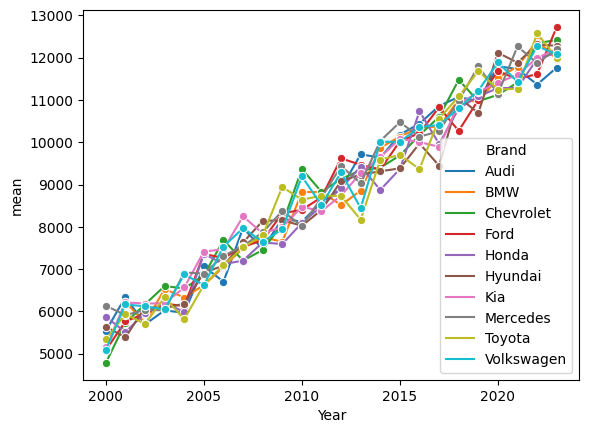

In [12]:
sns.lineplot(gp, x="Year", y="mean", hue="Brand", marker="o")

In [13]:
gp_asia = gp[gp["Brand"].isin(["Honda", "Hyundai", "Kia", "Toyota"])]

<Axes: xlabel='Year', ylabel='mean'>

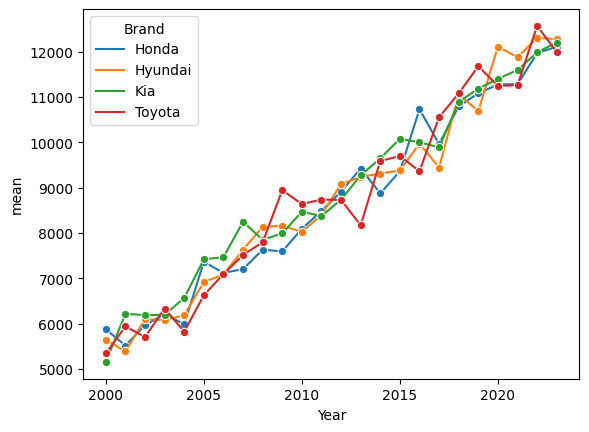

In [14]:
sns.lineplot(gp_asia, x="Year", y="mean", hue="Brand", marker="o")

In [15]:
gp = df.groupby(["Year", "Brand"]).agg(mean=("Price", "mean")) / df.groupby(["Year"]).agg(mean=("Price", "mean"))
gp.reset_index(inplace=True)
gp

,Year,Brand,mean
0,2000,Audi,1.026773
1,2000,BMW,0.938371
2,2000,Chevrolet,0.886850
3,2000,Ford,0.942380
4,2000,Honda,1.088721
...,...,...,...
235,2023,Hyundai,1.009002
236,2023,Kia,1.002972
237,2023,Mercedes,1.002352
238,2023,Toyota,0.985573


In [16]:
gp_asia = gp[gp["Brand"].isin(["Honda", "Hyundai", "Kia", "Toyota"])]

<Axes: xlabel='Year', ylabel='mean'>

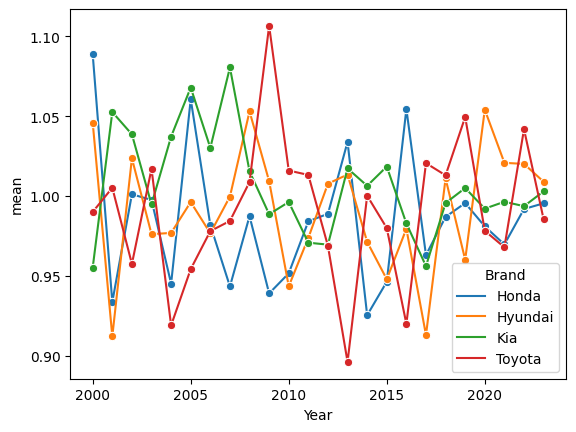

In [17]:
sns.lineplot(gp_asia, x="Year", y="mean", hue="Brand", marker="o")